In [ ]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
df = pd.read_csv("Churn_Modelling.csv")

In [ ]:
df.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


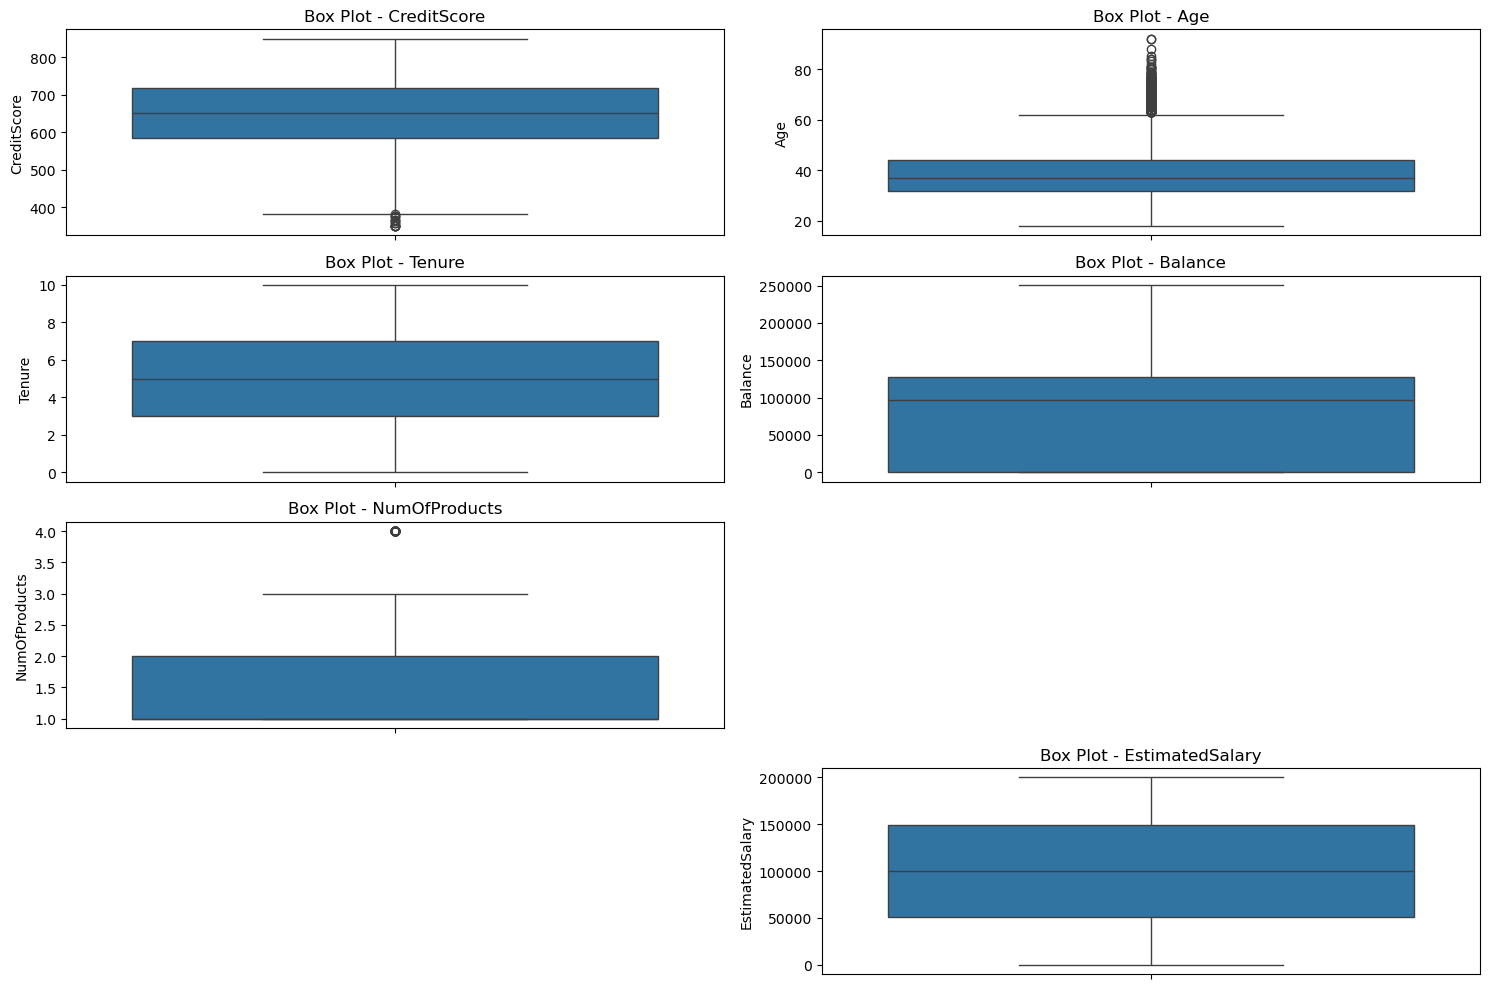

In [ ]:
# Drop irrelevant columns for visual analysis
df2 = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

# Box Plots for numerical features
plt.figure(figsize=(15, 10))
for i, column in enumerate(df2.select_dtypes(include=['float64', 'int64']).columns, 1):
    if column not in ['HasCrCard', 'IsActiveMember', 'Exited']:  # Exclude binary variables
        plt.subplot(4, 2, i)  # Adjust grid size as needed
        sns.boxplot(data=df2, y=column)
        plt.title(f'Box Plot - {column}')

plt.tight_layout()
plt.show()

3 groups have out;iers, Credit Scroe, Age, and Number of Products. For this model we will trim those outliers latter on and highly advising not to use this model for trimed groups/values. FExample, clearly, if customer is older than 60 and we trim outliers older than 60. It will be an ethical or appropriate to use our data for that group of people. Same goes for Credit Score less than 400.

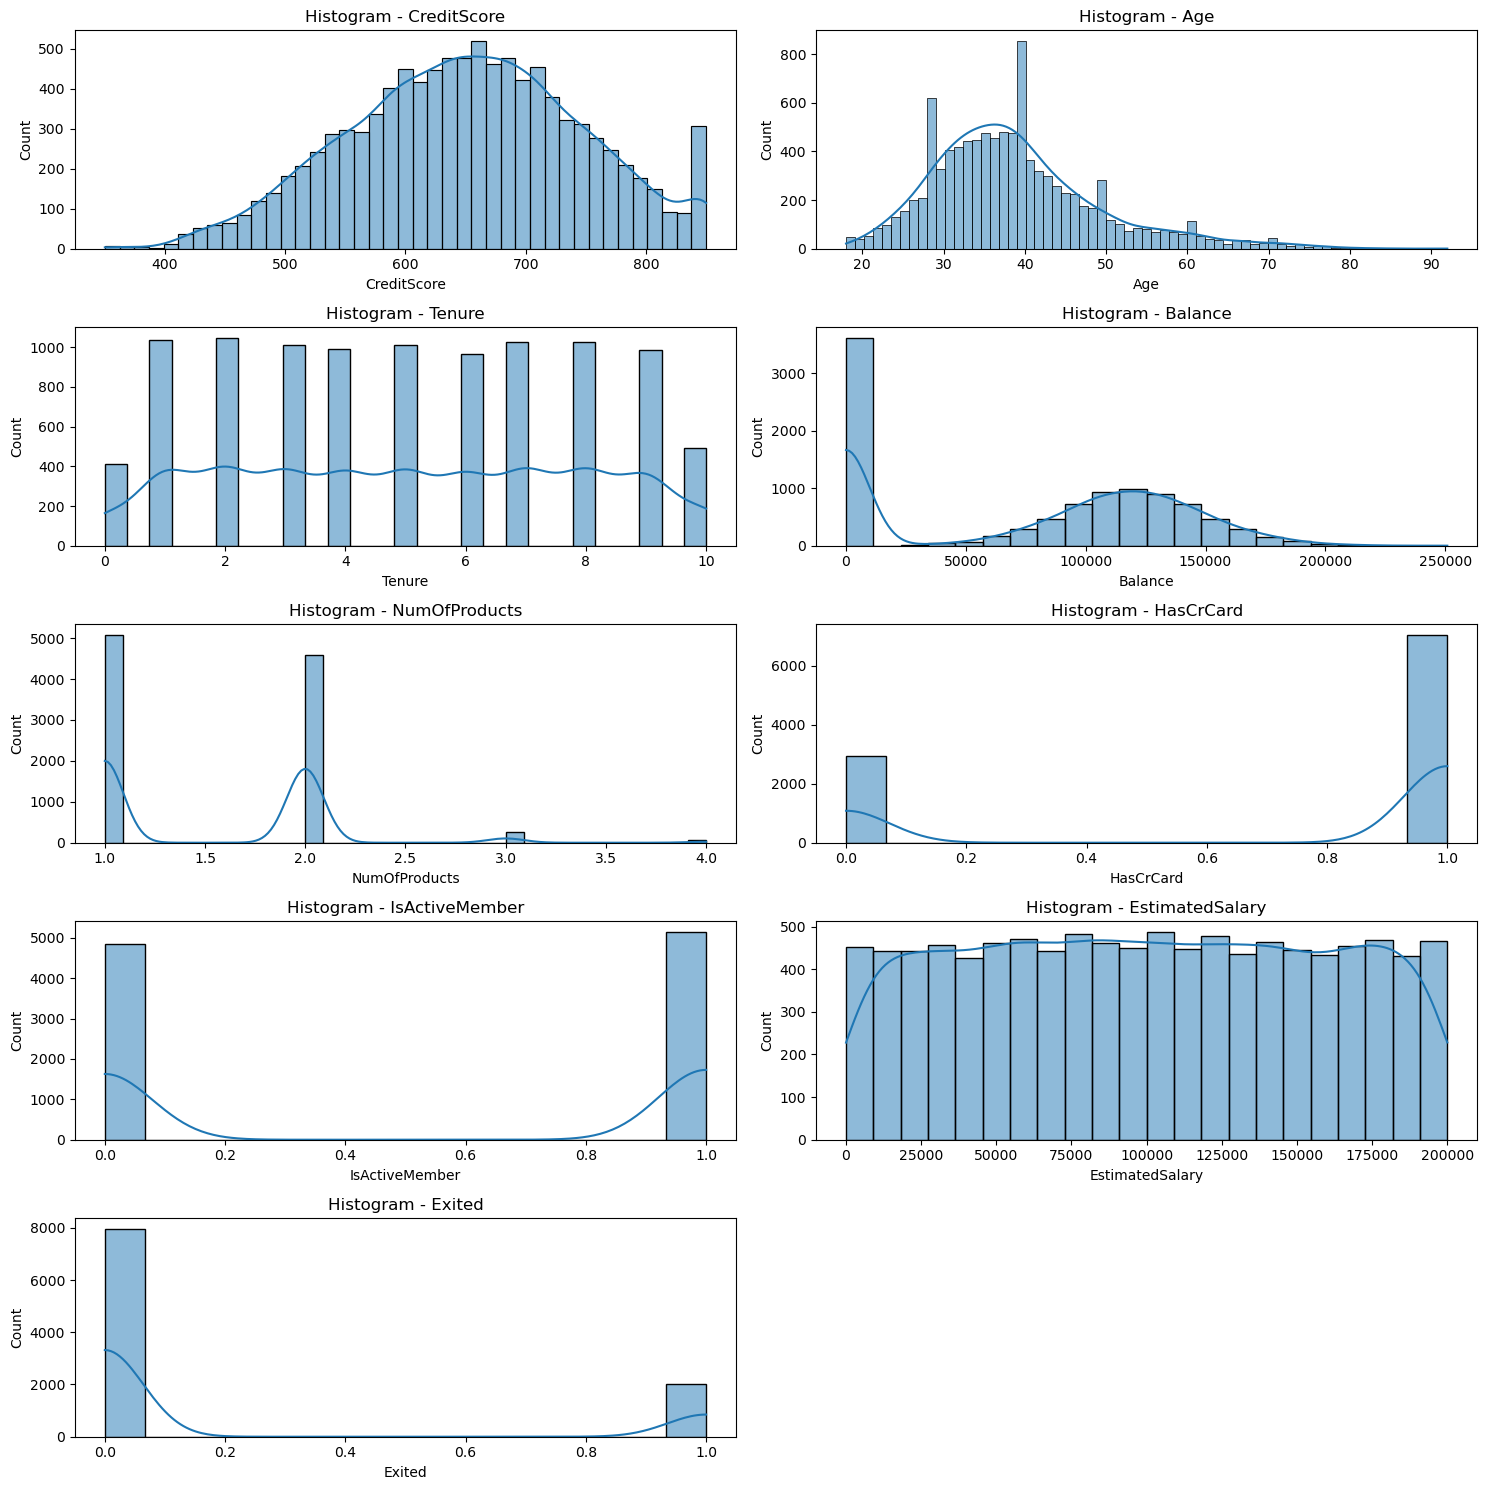

In [ ]:
# Histograms for numerical features
plt.figure(figsize=(15, 15))
for i, column in enumerate(df2.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(5, 2, i)
    sns.histplot(df2[column], kde=True)
    plt.title(f'Histogram - {column}')

plt.tight_layout()
plt.show()

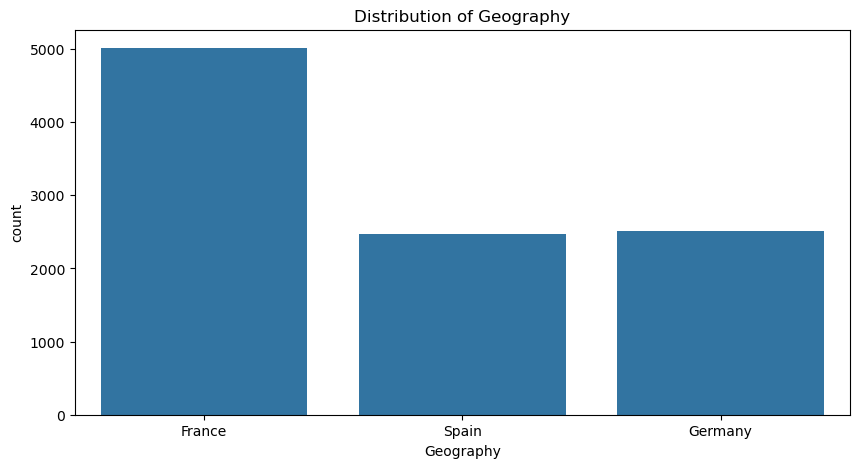

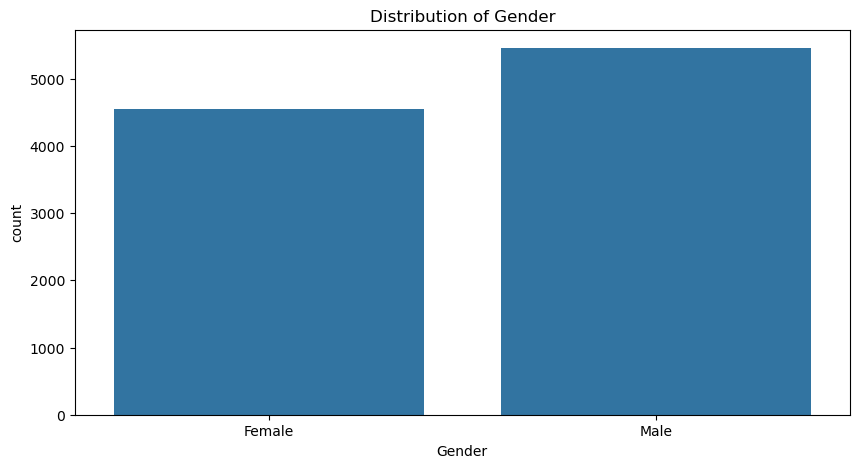

In [ ]:
# Bar Plots for categorical features
plt.figure(figsize=(10, 5))
sns.countplot(data=df2, x='Geography')
plt.title('Distribution of Geography')
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(data=df2, x='Gender')
plt.title('Distribution of Gender')
plt.show()

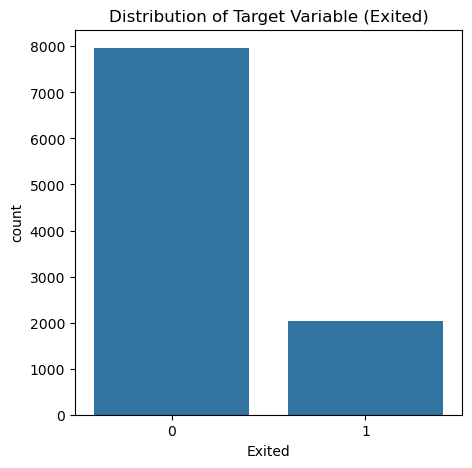

In [ ]:
# Count Plot for the target variable
plt.figure(figsize=(5, 5))
sns.countplot(data=df2, x='Exited')
plt.title('Distribution of Target Variable (Exited)')
plt.show()

# Without Geographic location

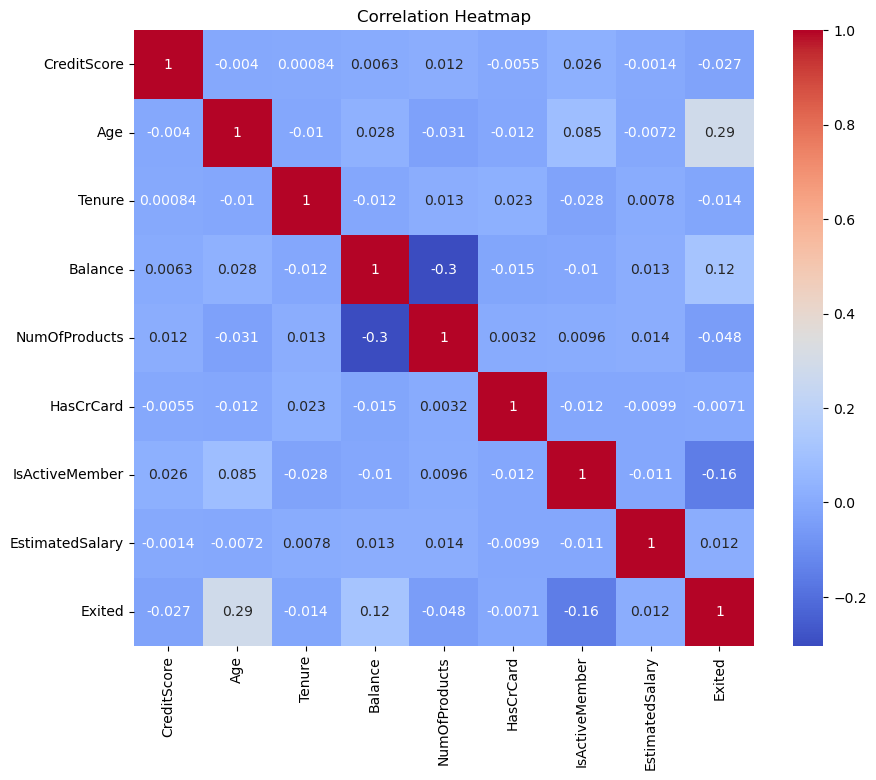

In [ ]:
# Select only numerical columns for the correlation matrix
numerical_df = df2.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = numerical_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### One Hote Encoder for Geographic location and Correlation Heatmap

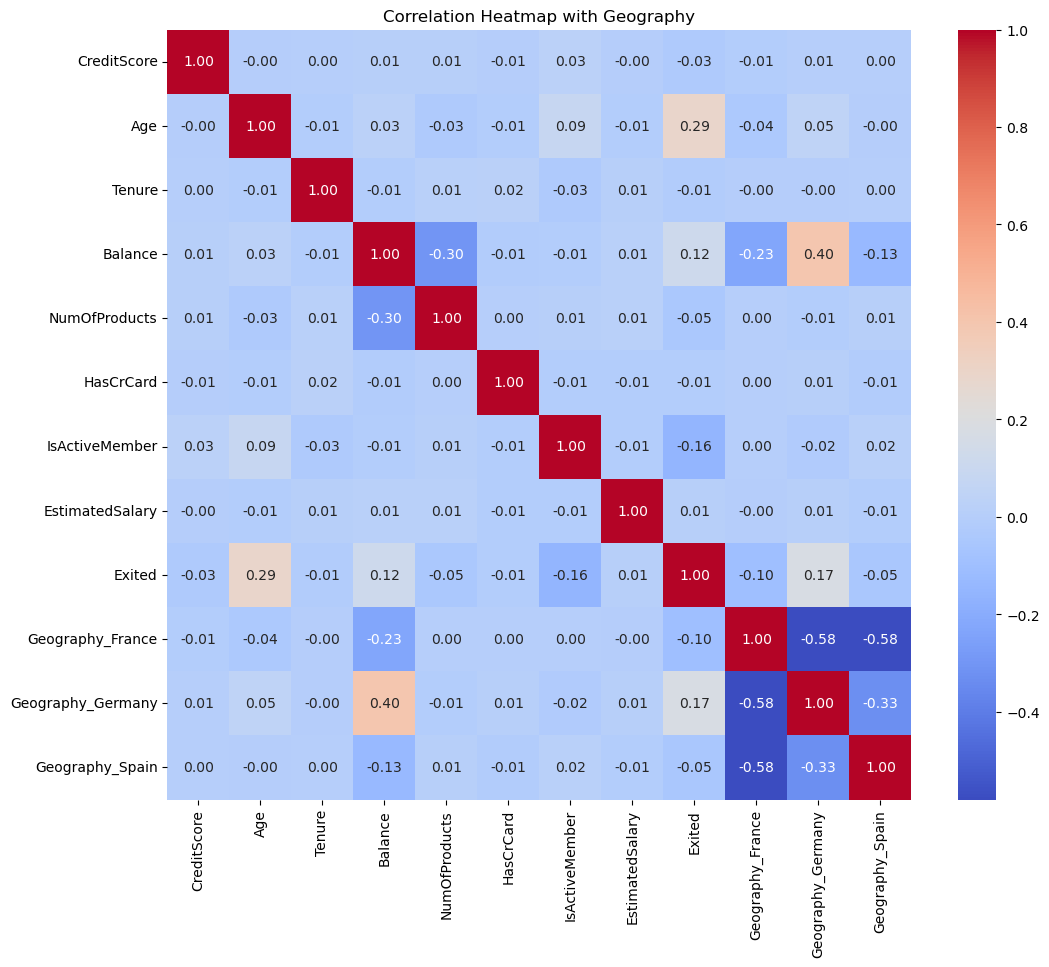

In [ ]:
# One-hot encode the 'Geography' column
one_hot_encoded_data = pd.get_dummies(df2['Geography'], prefix='Geography')

# Concatenate the one-hot encoded columns with the original DataFrame (excluding the original 'Geography' column)
numerical_and_encoded_df = pd.concat([df2.select_dtypes(include=['float64', 'int64']), one_hot_encoded_data], axis=1)

# Calculate the correlation matrix
corr_matrix = numerical_and_encoded_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))  # Adjust the figure size as needed
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap with Geography')
plt.show()

In [ ]:
#data_processed = numerical_and_encoded_df
data_processed = df2

In [ ]:
# Defining the features and target variable
X = data_processed.drop('Exited', axis=1)
y = data_processed['Exited']

# Encoding categorical variables
categorical_features = ['Geography', 'Gender']
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.difference(categorical_features)

# Creating a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting the preprocessor to the training data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

X_train_preprocessed.shape, X_test_preprocessed.shape

((8000, 13), (2000, 13))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

# Initializing the model
lr_model = LogisticRegression(random_state=42, max_iter=1000)

# Training the model
lr_model.fit(X_train_preprocessed, y_train)

# Predicting on the test set
y_pred = lr_model.predict(X_test_preprocessed)
y_pred_proba = lr_model.predict_proba(X_test_preprocessed)[:, 1]

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

accuracy, roc_auc


(0.811, 0.7788792987423027)

# LogisticRegression

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

# Sample dataset loading (replace with actual dataset path)
df = pd.read_csv('Churn_Modelling.csv')

# Define the features and target variable
X = df.drop(['Exited'], axis=1)
y = df['Exited']

# Specify numerical and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Remove irrelevant features for demonstration
numerical_features.remove('CustomerId')
categorical_features.remove('Surname')

# Preprocessing for numerical data: scaling and polynomial features
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False))
])

# Preprocessing for categorical data: one-hot encoding
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

print(f"Model Accuracy: {accuracy:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")

Model Accuracy: 0.8565
ROC-AUC Score: 0.8473


# Tunning XGBoost

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score


# Define the features and target variable
X = df.drop(['Exited'], axis=1)
y = df['Exited']

# Specify numerical and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Preprocessing for numerical data: scaling and polynomial features
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False))
])

# Preprocessing for categorical data: one-hot encoding
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the model pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

# Parameter grid for XGBoost
param_distributions = {
    'classifier__n_estimators': randint(100, 1000),
    'classifier__learning_rate': uniform(0.01, 0.3),
    'classifier__max_depth': randint(3, 10),
    'classifier__colsample_bytree': uniform(0.7, 0.3),
    'classifier__subsample': uniform(0.6, 0.4),
    'classifier__gamma': uniform(0, 0.5)
}

# RandomizedSearchCV
random_search = RandomizedSearchCV(model, param_distributions=param_distributions, n_iter=100, cv=3, verbose=2, n_jobs=-1, random_state=42)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters found: ", random_search.best_params_)
print("Best score found: ", random_search.best_score_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END classifier__colsample_bytree=0.8123620356542087, classifier__gamma=0.4753571532049581, classifier__learning_rate=0.22959818254342154, classifier__max_depth=7, classifier__n_estimators=120, classifier__subsample=0.6624074561769746; total time=   3.7s
[CV] END classifier__colsample_bytree=0.7467983561008608, classifier__gamma=0.02904180608409973, classifier__learning_rate=0.26985284373248053, classifier__max_depth=6, classifier__n_estimators=971, classifier__subsample=0.8832290311184181; total time=   8.0s
[CV] END classifier__colsample_bytree=0.7467983561008608, classifier__gamma=0.02904180608409973, classifier__learning_rate=0.26985284373248053, classifier__max_depth=6, classifier__n_estimators=971, classifier__subsample=0.8832290311184181; total time=   7.0s
[CV] END classifier__colsample_bytree=0.7061753482887407, classifier__gamma=0.48495492608099716, classifier__learning_rate=0.2597327922401265, classifier__max

## AUC-PR

In [ ]:
import pandas as pd

df = pd.read_csv('/content/engineered_dataset.csv')

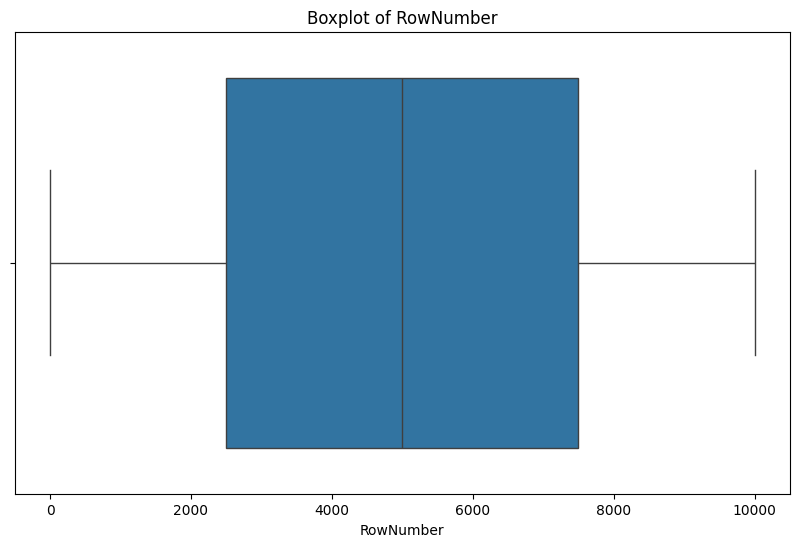

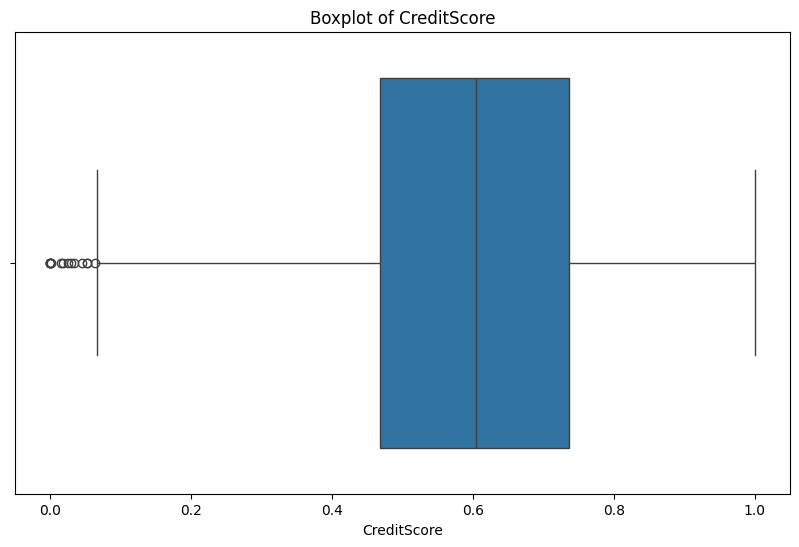

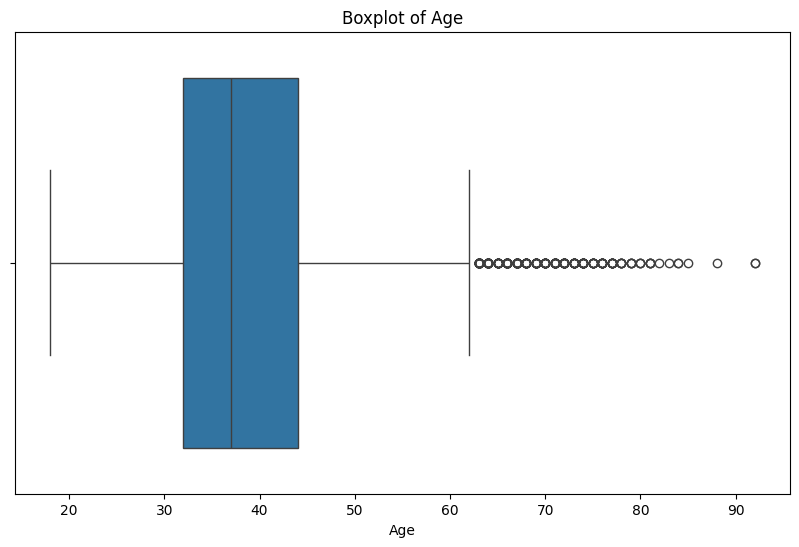

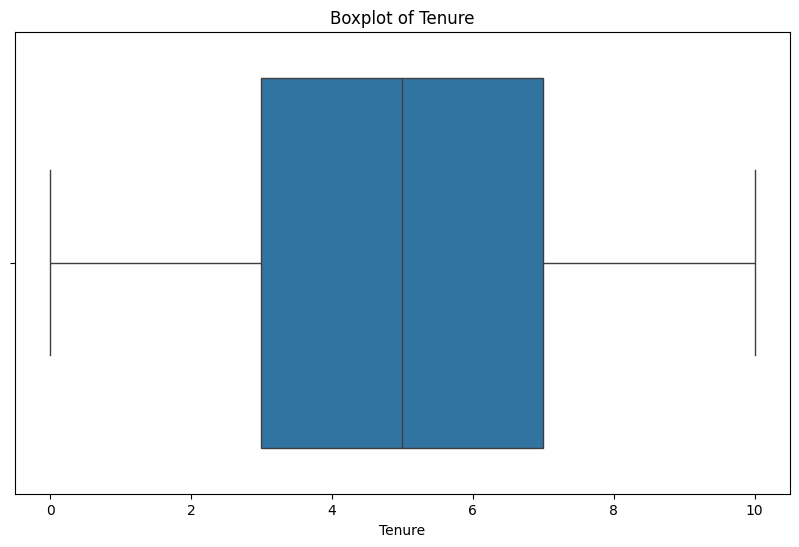

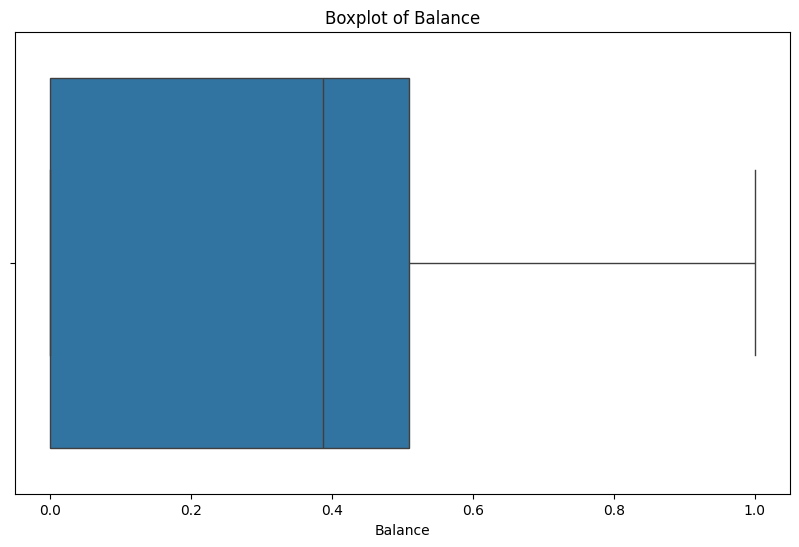

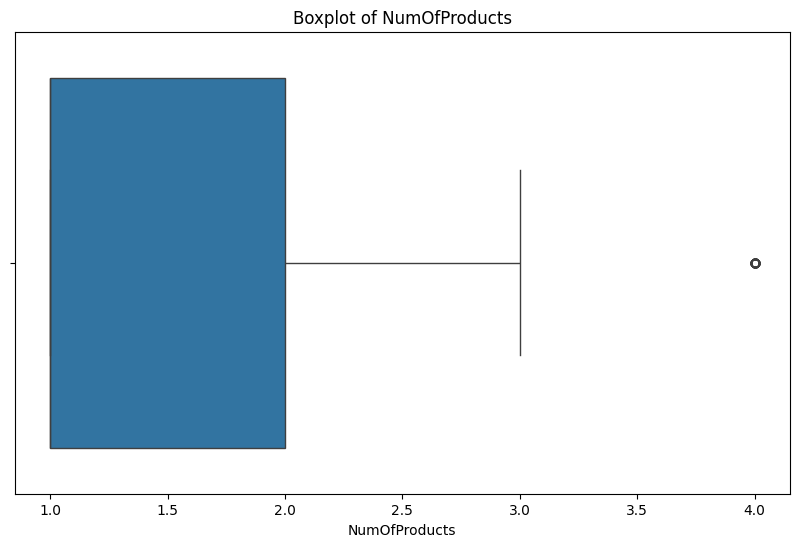

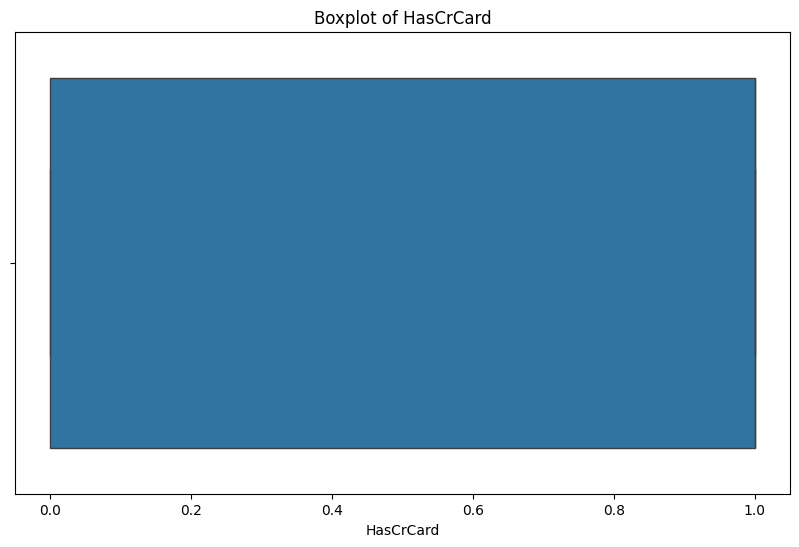

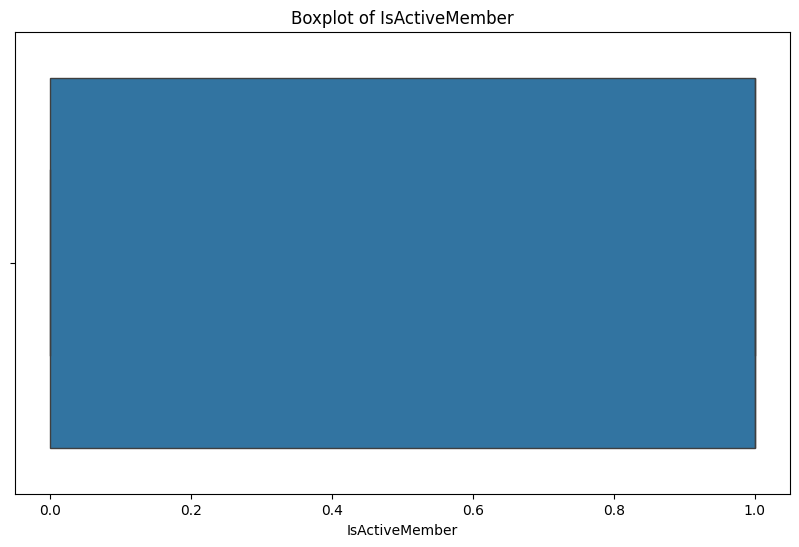

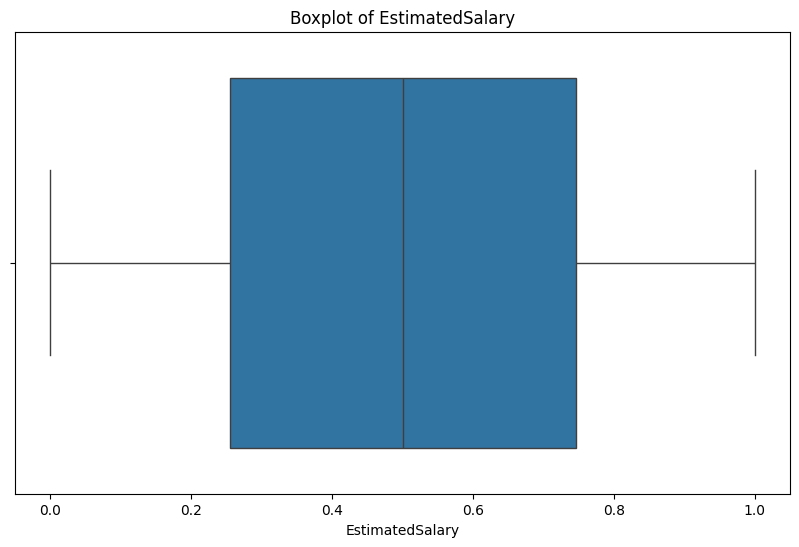

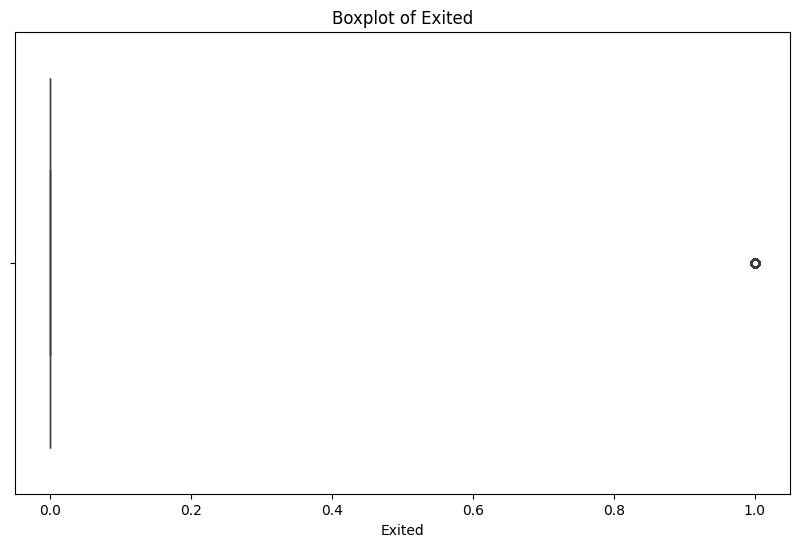

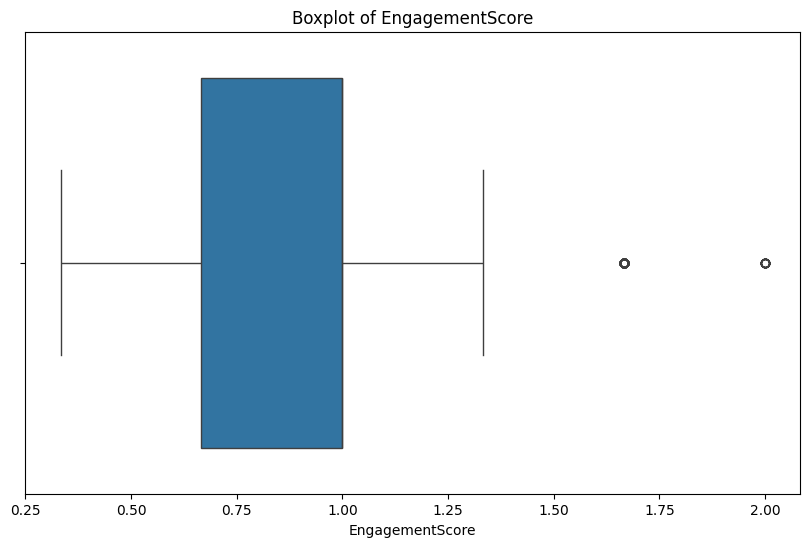

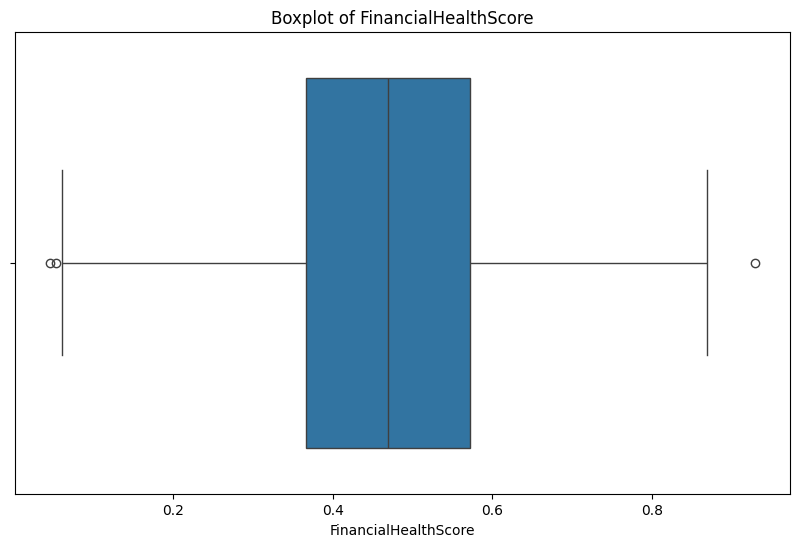

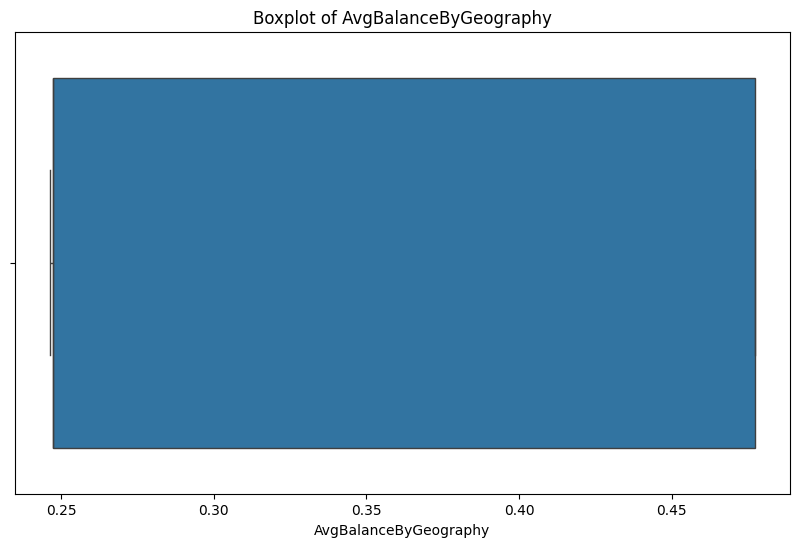

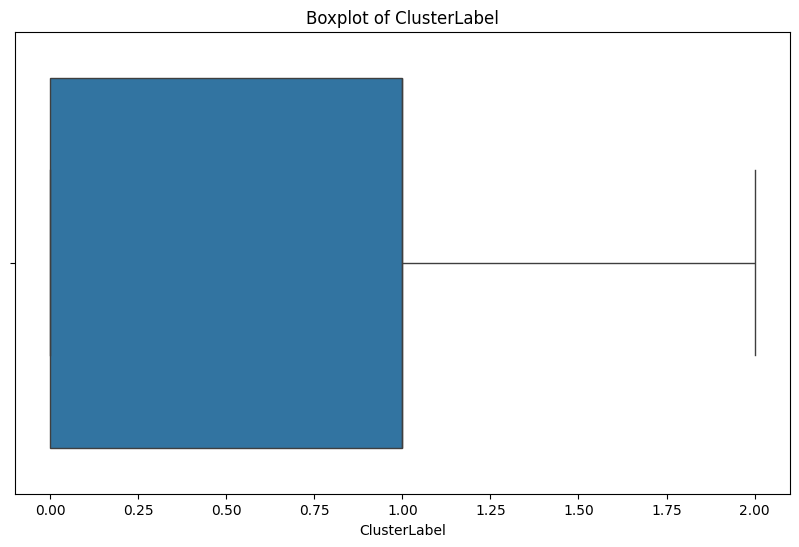

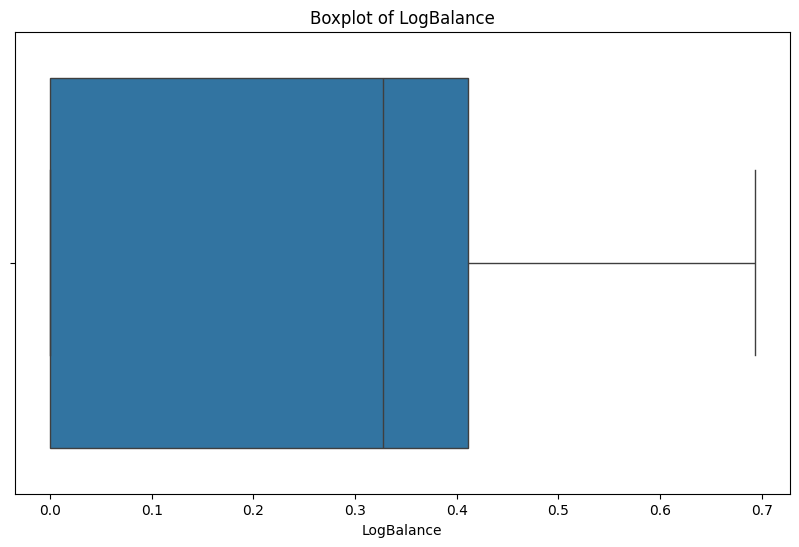

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [ ]:
df_trimmed = df.copy()

# Exclude 'Exited' from the columns to check for outliers
numeric_cols = df_trimmed.select_dtypes(include=['float64', 'int64']).columns.tolist()
if 'Exited' in numeric_cols:  # Check if 'Exited' is a numeric column and remove it from the list
    numeric_cols.remove('Exited')

# Initialize a set with all indices to potentially keep
indices_to_keep = set(df_trimmed.index)

for col in numeric_cols:
    Q1 = df_trimmed[col].quantile(0.25)
    Q3 = df_trimmed[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find indices that are not outliers
    valid_indices = df_trimmed[(df_trimmed[col] >= lower_bound) & (df_trimmed[col] <= upper_bound)].index

    # Intersection of indices to keep with valid indices for this column
    indices_to_keep.intersection_update(valid_indices)

# Convert indices_to_keep from a set to a list before using it for indexing
df_trimmed = df_trimmed.loc[list(indices_to_keep)]

print(f"Original DataFrame shape: {df.shape}")
print(f"Trimmed DataFrame shape: {df_trimmed.shape}")

Original DataFrame shape: (10000, 14)
Trimmed DataFrame shape: (9568, 14)


In [ ]:
exited_counts = df_trimmed['Exited'].value_counts()
print(exited_counts)

Exited
0    7659
1    1833
Name: count, dtype: int64


In [ ]:
df_trimmed.to_csv('engineered_dataset_trimed.csv')

In [ ]:
import pandas as pd
df = pd.read_csv('/content/engineered_dataset_trimed.csv')

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from dataprep.eda import plot, plot_correlation
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (confusion_matrix, precision_score, recall_score,
                             roc_auc_score, ConfusionMatrixDisplay, f1_score,
                             accuracy_score, classification_report)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

import os

df2 = df_trimmed.copy()
# Define the features and target variable
X = df2.drop(['Exited'], axis=1)
y = df2['Exited']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Specify numerical and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Preprocessing for numerical data: scaling and polynomial features
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False))
])

# Preprocessing for categorical data: one-hot encoding
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])
val_cnts = y_train.value_counts()
scale_pos_weight = val_cnts[0] / val_cnts[1]
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(tree_method='gpu_hist',
                                 predictor='gpu_predictor',
                                 #scale_pos_weight=scale_pos_weight,
                                 use_label_encoder=False,
                                 eval_metric='auc',
                                 random_state=42))
])

# Parameter grid for XGBoost
param_distributions = {
    'classifier__n_estimators': randint(100, 1000),
    'classifier__learning_rate': uniform(0.03, 0.007),
    'classifier__max_depth': randint(3, 10),
    'classifier__colsample_bytree': uniform(0.7, 0.3),
    'classifier__subsample': uniform(0.6, 0.4),
    'classifier__gamma': uniform(0, 0.5)
}

random_search = RandomizedSearchCV(model, param_distributions=param_distributions, n_iter=100, cv=3, verbose=2, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)
y_pred = random_search.predict(X_test)

print("Best parameters found: ", random_search.best_params_)
print("Best score found: ", random_search.best_score_)
print(classification_report(y_test, y_pred, target_names=['Not Exited', 'Exited']))
print(f"Overall Accuracy: {accuracy_score(y_test, y_pred):.4f}")

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:34:12] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:34:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters found:  {'classifier__colsample_bytree': 0.7956926890881284, 'classifier__gamma': 0.4224376554847273, 'classifier__learning_rate': 0.03016290355015078, 'classifier__max_depth': 4, 'classifier__n_estimators': 214, 'classifier__subsample': 0.7127419099093599}
Best score found:  0.8624248199837218
              precision    recall  f1-score   support

  Not Exited       0.87      0.97      0.92      1524
      Exited       0.79      0.45      0.58       390

    accuracy                           0.86      1914
   macro avg       0.83      0.71      0.75      1914
weighted avg       0.86      0.86      0.85      1914

Overall Accuracy: 0.8636


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:34:13] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


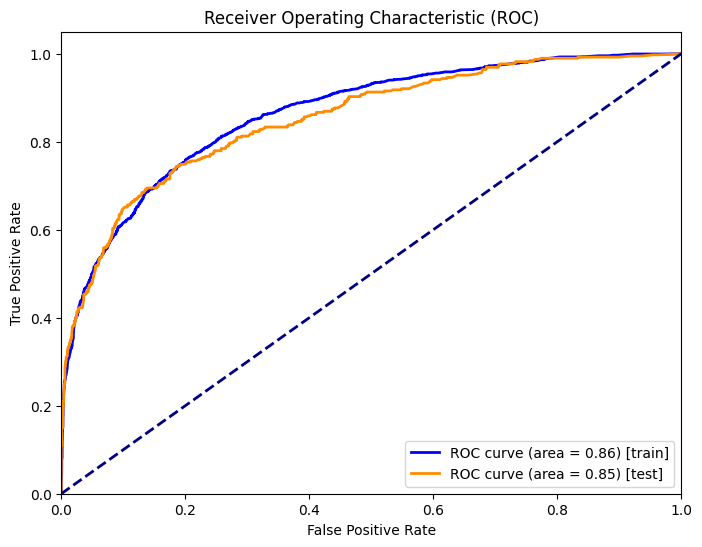

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming the model has been fitted as shown above
# Predict probabilities for the training and test sets
y_train_prob = model.predict_proba(X_train)[:, 1]
y_test_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for each class
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
roc_auc_train = auc(fpr_train, tpr_train)

fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)
roc_auc_test = auc(fpr_test, tpr_test)

# Plotting
plt.figure(figsize=(8, 6))
lw = 2
plt.plot(fpr_train, tpr_train, color='blue',
         lw=lw, label='ROC curve (area = %0.2f) [train]' % roc_auc_train)
plt.plot(fpr_test, tpr_test, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f) [test]' % roc_auc_test)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Feature Engineered Data

In [ ]:
df5 = pd.read_csv("engineered_dataset.csv")

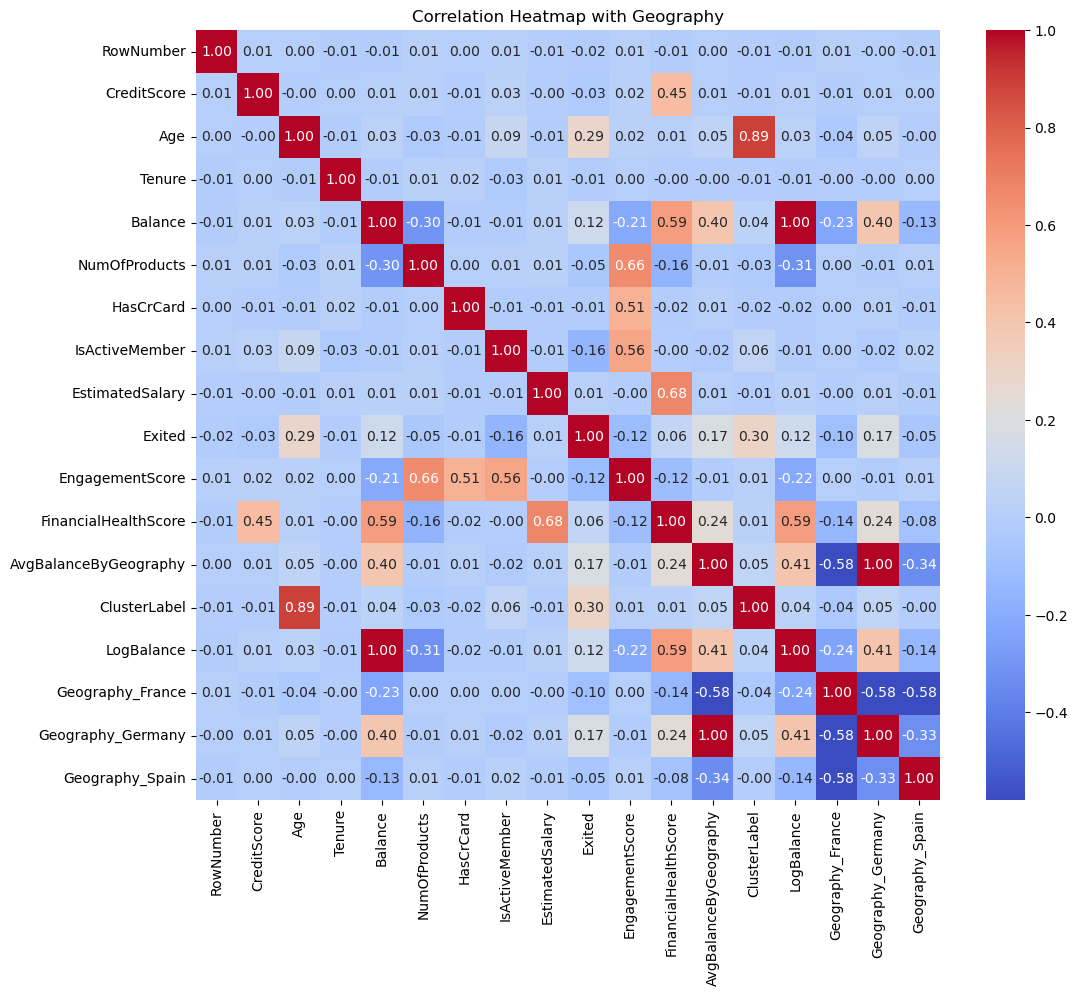

In [ ]:
# One-hot encode the 'Geography' column
one_hot_encoded_data = pd.get_dummies(df5['Geography'], prefix='Geography')

# Concatenate the one-hot encoded columns with the original DataFrame (excluding the original 'Geography' column)
numerical_and_encoded_df = pd.concat([df5.select_dtypes(include=['float64', 'int64']), one_hot_encoded_data], axis=1)

# Calculate the correlation matrix
corr_matrix = numerical_and_encoded_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))  # Adjust the figure size as needed
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap with Geography')
plt.show()

# Continue Testing on Feature Engineered Data Set

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from xgboost import XGBClassifier

# Assuming df5 is your DataFrame and it's already loaded
# Example: df5 = pd.read_csv('your_dataset.csv')

# Define the features and target variable
X = df5.drop(['Exited'], axis=1)  # Replace 'Exited' with your target column name if different
y = df5['Exited']  # Ensure this matches your actual target column name

# Specify numerical and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Preprocessing for numerical data: MinMax scaling and polynomial features
numerical_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False))
])

# Preprocessing for categorical data: one-hot encoding
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])

# Calculate scale_pos_weight for handling class imbalance
scale_pos_weight = len(y[y == 0]) / len(y[y == 1])

# Define the model pipeline with XGBoost classifier, including regularization
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(objective="binary:logistic",
                                 use_label_encoder=False,
                                 eval_metric='logloss',
                                 random_state=42,
                                 scale_pos_weight=scale_pos_weight,
                                 reg_lambda=1,
                                 reg_alpha=0.1
                                ))
])

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Predictions for test and train data
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

# Calculate recall for both train and test data
recall_train = recall_score(y_train, y_pred_train)
recall_test = recall_score(y_test, y_pred_test)

# ROC-AUC score for train data
roc_auc_train = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])

# Print performance metrics
print(f"Train Accuracy: {accuracy_train:.4f}")
print(f"Train Recall: {recall_train:.4f}")
print(f"Train ROC-AUC: {roc_auc_train:.4f}")
print(f"Test Accuracy: {accuracy_test:.4f}")
print(f"Test Recall: {recall_test:.4f}")
print(f"Test ROC-AUC: {roc_auc_test:.4f}")

Train Accuracy: 0.9878
Train Recall: 0.9994
Train ROC-AUC: 0.9998
Test Accuracy: 0.8445
Test Recall: 0.6310
Test ROC-AUC: 0.8437


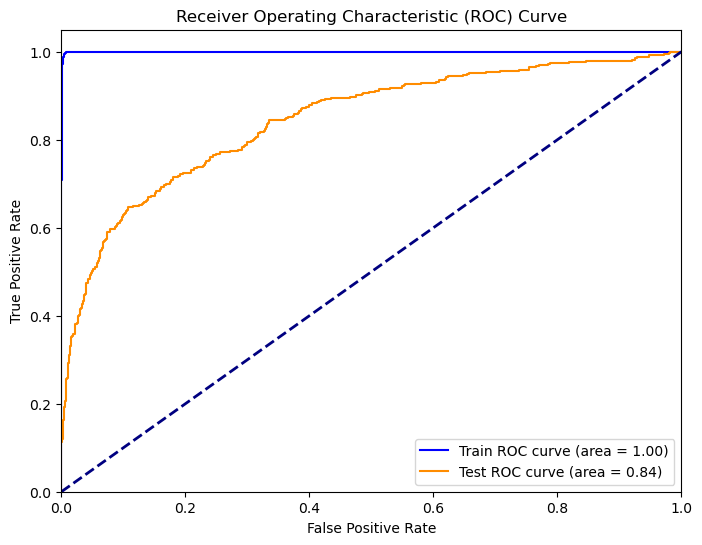

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities for both the training and testing data
y_train_probs = model.predict_proba(X_train)[:, 1]
y_test_probs = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve for both
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_probs)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_probs)

# Calculate AUC for both
roc_auc_train = auc(fpr_train, tpr_train)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curve for both
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Train ROC curve (area = {roc_auc_train:.2f})', color='blue')
plt.plot(fpr_test, tpr_test, label=f'Test ROC curve (area = {roc_auc_test:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

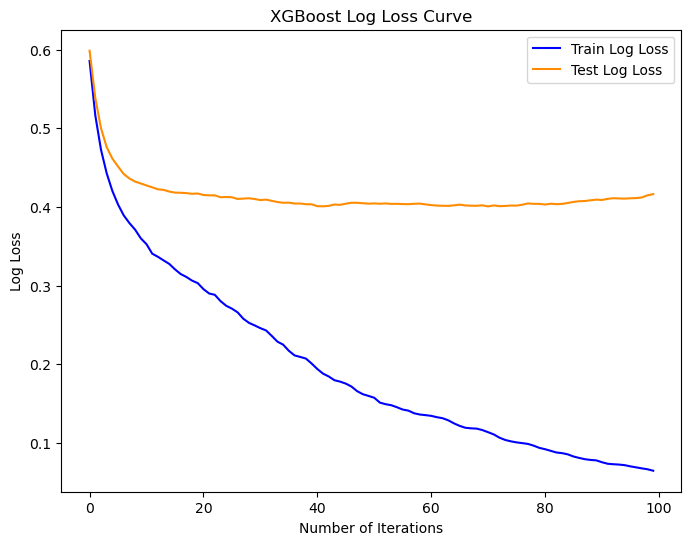

In [ ]:
# This assumes you've stored evals_result from an XGBoost model fitting process
# The model should be fitted with eval_set=[(X_train, y_train), (X_test, y_test)]

epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)

plt.figure(figsize=(8, 6))
plt.plot(x_axis, results['validation_0']['logloss'], label='Train Log Loss', color='blue')
plt.plot(x_axis, results['validation_1']['logloss'], label='Test Log Loss', color='darkorange')
plt.legend()
plt.ylabel('Log Loss')
plt.xlabel('Number of Iterations')
plt.title('XGBoost Log Loss Curve')
plt.show()

After we implement our new features we were able to observe model's improvements. However, due to complexity we decided not to use those features.